# Advanced methods in Python

As a demo of the language, plot sin and cos on the same axis:

In [1]:
# load some key packages:
import numpy as np                #a numerical package
import pandas as pd               # a data analysis package
import matplotlib.pyplot as plt   # a plotting package

# to display the plots in the same document
%matplotlib inline

In [3]:
# load some the netcdf-handling package:
import xarray as xr

data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/butler.nc'
variable = 'AirTC_Avg'

ds = xr.open_dataset(data_url)

If you want to check out the names of the variables in this NetCDF file, you can run:

## Rainy days

In [9]:
ds_wet_day = ds['Rain_mm_3_Tot'].resample('1D','time', how='sum', label='right')
wettest = ds_wet_day.to_pandas().sort_values(ascending=False)
wettest.head()

time
2011-08-29    187.442
2011-08-15    133.860
2014-05-01     70.614
2013-11-28     70.360
2011-07-04     65.534
dtype: float64

In [10]:
rainy_day = ds[['Rain_mm_3_Tot', 'VW']].sel(time=slice('2014-04-29', '2014-05-01'))

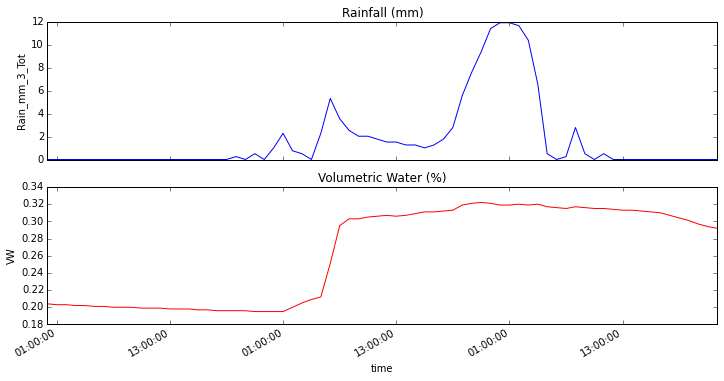

In [11]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12,6), sharex=True)

rainy_day['Rain_mm_3_Tot'].plot(ax=axes[0], c='b')
axes[0].set_title('Rainfall (mm)')

rainy_day['VW'].plot(ax=axes[1], c='r')
axes[1].set_title('Volumetric Water (%)')

plt.show()

## Rain on wet soil

In [12]:
rain_on_wet_soil = ds.where((ds['Rain_mm_3_Tot']>0) & (ds['VW']>.25) & (ds['AirTC_Avg']>10)).dropna('time')
df = rain_on_wet_soil[['Rain_mm_3_Tot', 'VW', 'AirTC_Avg']].to_dataframe()
df = df.drop(['lat', 'lon', 'station_name'], axis=1)
df.tail()

,Rain_mm_3_Tot,VW,AirTC_Avg
time,,,
2016-02-25 08:00:00,3.302,0.343,15.66
2016-02-25 09:00:00,2.032,0.342,14.75
2016-03-02 08:00:00,1.270,0.292,13.41
2016-03-02 09:00:00,2.794,0.307,12.61
2016-03-02 10:00:00,1.270,0.322,10.56


## Monthly rainfall

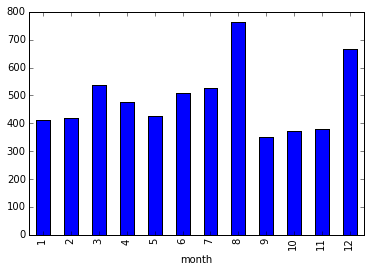

In [13]:
monthly_rainfall = ds['Rain_mm_3_Tot'].groupby('time.month').sum('time').to_pandas()
monthly_rainfall.plot.bar()